IMPORTING THE REQUIRED LIBRARIES

In [1]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
stopwords=nltk.corpus.stopwords.words('english')
wordnet_lemmatizer=WordNetLemmatizer()

LOADING THE DATASET

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Python/train_product_data.csv")

In [4]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."


In [5]:
df.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."


EXPLORATORY DATA ANALYSIS

In [6]:
print(df.product_category_tree.value_counts())

product_category_tree
Clothing                       5316
Jewellery                      3218
Footwear                       1083
Automotive                      937
Mobiles & Accessories           768
Home Decor & Festive Needs      714
Kitchen & Dining                610
Computers                       531
Watches                         526
Tools & Hardware                379
Toys & School Supplies          271
Pens & Stationery               264
Baby Care                       224
Bags, Wallets & Belts           158
Name: count, dtype: int64


In [7]:
df.isnull().sum()

,0
uniq_id,0
crawl_timestamp,0
product_url,0
product_name,0
product_category_tree,0
pid,0
retail_price,57
discounted_price,57
image,3
is_FK_Advantage_product,0


In [8]:
df=df.fillna("Nan")
df.isnull().sum()

,0
uniq_id,0
crawl_timestamp,0
product_url,0
product_name,0
product_category_tree,0
pid,0
retail_price,0
discounted_price,0
image,0
is_FK_Advantage_product,0


In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   uniq_id                  14999 non-null  object
 1   crawl_timestamp          14999 non-null  object
 2   product_url              14999 non-null  object
 3   product_name             14999 non-null  object
 4   product_category_tree    14999 non-null  object
 5   pid                      14999 non-null  object
 6   retail_price             14999 non-null  object
 7   discounted_price         14999 non-null  object
 8   image                    14999 non-null  object
 9   is_FK_Advantage_product  14999 non-null  bool  
 10  description              14999 non-null  object
 11  product_rating           14999 non-null  object
 12  overall_rating           14999 non-null  object
 13  brand                    14999 non-null  object
 14  product_specifications   14999 non-nul

In [11]:
print(df.product_category_tree.value_counts())

product_category_tree
Clothing                       5316
Jewellery                      3218
Footwear                       1083
Automotive                      937
Mobiles & Accessories           768
Home Decor & Festive Needs      714
Kitchen & Dining                610
Computers                       531
Watches                         526
Tools & Hardware                379
Toys & School Supplies          271
Pens & Stationery               264
Baby Care                       224
Bags, Wallets & Belts           158
Name: count, dtype: int64


In [12]:
df.description.sample(5)

,description
10998,JANKI JEWELLERS Alloy Pearl Rhodium Bangle Set...
12466,Orange Plum Printed Men's Round Neck T-Shirt -...
13639,Silly People Graphic Print Women's Round Neck ...
6108,Flipkart.com: Buy Tara Lifestyle Krishna Print...
9536,Key Features of RadadiyaTRD Embriodered Bollyw...


<Axes: xlabel='product_category_tree'>

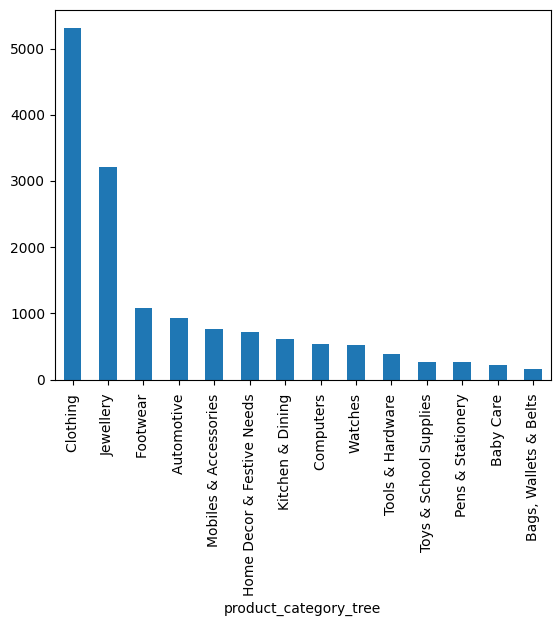

In [13]:
df.product_category_tree.value_counts().plot(kind="bar",rot=90)

The Data Set is highly imbalanced as the two dominating categories are Clothing and Jewellery.

In [14]:
df.describe()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
count,14999,14999,14999,14999,14999,14999,14999.0,14999.0,14999,14999,14999,14999,14999,14999,14999
unique,14999,246,14999,9345,14,14997,1847.0,2033.0,13763,2,13164,36,36,2312,14083
top,c2d766ca982eca8304150849735ffef9,2015-12-01 12:40:44 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,S4S Stylish Women's Push-up Bra,Clothing,ACCEJ6TESY7AFT5W,999.0,499.0,"[""http://img6a.flixcart.com/image/car-mat/m/t/...",False,Fashion Jewellery Alloy Necklace - Buy Fashion...,No rating available,No rating available,Nan,"{""product_specification""=>[{""key""=>""Type"", ""va..."
freq,1,1960,1,94,5316,2,957.0,841.0,45,14312,38,13520,13520,4710,71


In [15]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
14994,False
14995,False
14996,False
14997,False


In [16]:
df1=df[['product_category_tree','description']]

In [17]:
df1.head()

,product_category_tree,description
0,Clothing,Key Features of Alisha Solid Women's Cycling S...
1,Footwear,Key Features of AW Bellies Sandals Wedges Heel...
2,Clothing,Key Features of Alisha Solid Women's Cycling S...
3,Clothing,Key Features of Alisha Solid Women's Cycling S...
4,Footwear,"Key Features of dilli bazaaar Bellies, Corpora..."


Since we only need the two columns product_category_tree and description we will add them to another datafrme so that we can work on them easily.

In [18]:
df.brand.value_counts()

,count
brand,
Nan,4710
Allure Auto,469
Regular,312
Slim,288
Voylla,273
...,...
Vedic Vaani,1
Chinhhari Arts,1
LAMS,1


Count of all the brand Names

In [19]:
df.retail_price.value_counts()

,count
retail_price,
999.0,957
499.0,602
899.0,476
799.0,476
599.0,472
...,...
35100.0,1
16646.0,1
15783.0,1


DATA PREPROCESSING

In [20]:
df1.description=df1.description.apply(lambda x:x.strip())
df1.product_category_tree=df1.product_category_tree.apply(lambda x:x.strip())
df1.description

<ipython-input-20-f937b0f37781>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.description=df1.description.apply(lambda x:x.strip())
<ipython-input-20-f937b0f37781>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.product_category_tree=df1.product_category_tree.apply(lambda x:x.strip())


,description
0,Key Features of Alisha Solid Women's Cycling S...
1,Key Features of AW Bellies Sandals Wedges Heel...
2,Key Features of Alisha Solid Women's Cycling S...
3,Key Features of Alisha Solid Women's Cycling S...
4,"Key Features of dilli bazaaar Bellies, Corpora..."
...,...
14994,TheLostPuppy Back Cover for Apple iPad Air (Mu...
14995,Kenway Retail Brass Copper Cuff\n ...
14996,TheLostPuppy Back Cover for Apple iPad Air 2 (...
14997,Kenway Retail Brass Copper Cuff\n ...


Merging the categories to reduce class imbalance

In [21]:

for i in range(len(df1.product_category_tree)):
    if df1.product_category_tree[i]=="Watches":
        df1.product_category_tree[i]="Mobiles & Accessories"

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df1.product_category_tree[i]="Mobiles & Accessories"
<ipython-input-21-c073f14cfe11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.product_category_tree[i]="Mobiles & Accessories"
<ipython-input-21-c073f14cfe11>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a co

In [22]:
for i in range(len(df1.product_category_tree)):
    if df1.product_category_tree[i]=="Bags, Wallets & Belts":
        df1.product_category_tree[i]="Mobiles & Accessories"

<ipython-input-22-f577bf324e57>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df1.product_category_tree[i]="Mobiles & Accessories"
<ipython-input-22-f577bf324e57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [23]:
for i in range(len(df1.product_category_tree)):
    if df1.product_category_tree[i]=="Pens & Stationery":
        df1.product_category_tree[i]="Toys & School Supplies"

<ipython-input-23-9bda33cf8736>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df1.product_category_tree[i]="Toys & School Supplies"
<ipython-input-23-9bda33cf8736>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [24]:
def cleanData(row):
    row = row.lower()
    row = re.sub('[^a-zA-Z]',' ',row)
    token = row.split()
    removeStop = [i for i in token if i not in stopwords]
    lemm_text_temp = [wordnet_lemmatizer.lemmatize(word,pos='v') for word in removeStop]
    lemm_text = [wordnet_lemmatizer.lemmatize(word,pos='n') for word in lemm_text_temp]
    cleaned_string = ""
    for word in lemm_text:
        cleaned_string+=word
        cleaned_string+= ' '
    return cleaned_string

In [25]:
df1['cleaned_data']=df1['description'].apply(lambda x:cleanData(x))
df

<ipython-input-25-e3165f7466d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cleaned_data']=df1['description'].apply(lambda x:cleanData(x))


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,abda697c6da997f66c78d91d6c88078c,2015-12-20 08:26:17 +0000,http://www.flipkart.com/thelostpuppy-back-cove...,TheLostPuppy Back Cover for Apple iPad Air,Mobiles & Accessories,ACCE9ZY9K4BHVYNA,2199.0,599.0,"[""http://img6a.flixcart.com/image/cases-covers...",False,TheLostPuppy Back Cover for Apple iPad Air (Mu...,No rating available,No rating available,TheLostPuppy,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
14995,87bcdd46bb48bfc1045d7ee84aef7b7a,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kenway-retail-brass-co...,Kenway Retail Brass Copper Cuff,Jewellery,BBAEA49HNDNQYGJU,529.0,295.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,Kenway Retail Brass Copper Cuff\n ...,No rating available,No rating available,Kenway Retail,"{""product_specification""=>[{""key""=>""Collection..."
14996,b4fad612a9f72f1ffd10134f9be7cfe8,2015-12-20 08:26:17 +0000,http://www.flipkart.com/thelostpuppy-back-cove...,TheLostPuppy Back Cover for Apple iPad Air 2,Mobiles & Accessories,ACCE9Z2HKHDGH7JY,2199.0,599.0,"[""http://img5a.flixcart.com/image/cases-covers...",False,TheLostPuppy Back Cover for Apple iPad Air 2 (...,No rating available,No rating available,TheLostPuppy,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
14997,1336909e5468b63c9b1281350eba647d,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kenway-retail-brass-co...,Kenway Retail Brass Copper Cuff,Jewellery,BBAEA49HHKJTPHWV,547.0,322.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,Kenway Retail Brass Copper Cuff\n ...,No rating available,No rating available,Kenway Retail,"{""product_specification""=>[{""key""=>""Collection..."


The text in the description is cleaned and now it can be used for training and testing.

In [26]:
df1.head()

,product_category_tree,description,cleaned_data
0,Clothing,Key Features of Alisha Solid Women's Cycling S...,key feature alisha solid woman cycle short cot...
1,Footwear,Key Features of AW Bellies Sandals Wedges Heel...,key feature aw belly sandal wedge heel casuals...
2,Clothing,Key Features of Alisha Solid Women's Cycling S...,key feature alisha solid woman cycle short cot...
3,Clothing,Key Features of Alisha Solid Women's Cycling S...,key feature alisha solid woman cycle short cot...
4,Footwear,"Key Features of dilli bazaaar Bellies, Corpora...",key feature dilli bazaaar belly corporate casu...


Generating Word Cloud to analyse Data

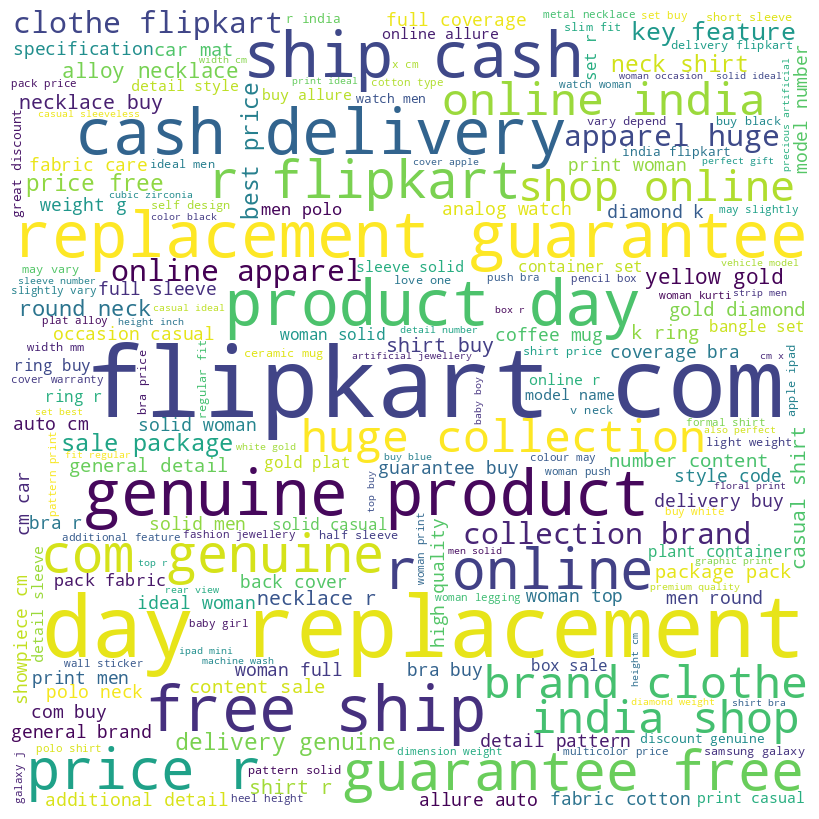

In [27]:
comment_words = ''
comment_words += " ".join(df1['cleaned_data'])+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Splitting the data in training and testing

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df1['cleaned_data'],df1['product_category_tree'], test_size=0.2, random_state=42)

In [29]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((11999,), (3000,), (11999,), (3000,))

VECTORIZATION USING TFIDF VECTORIZER

In [30]:
vect=TfidfVectorizer()
vec_train_data = vect.fit_transform(X_train)
vec_test_data = vect.transform(X_test)

In [31]:
MNB_clf = MultinomialNB()
MNB_clf.fit(vec_train_data, y_train)
MNB_pred = MNB_clf.predict(vec_test_data)

In [32]:
MNB_accuracy = accuracy_score(y_test,MNB_pred)*100
MNB_accuracy

94.16666666666667

Multinomial Naive Bayes provides a good accuracy on the data.

In [33]:
lr_clf=LogisticRegression()
lr_clf.fit(vec_train_data, y_train)
lr_pred = lr_clf.predict(vec_test_data)
lr_accuracy = accuracy_score(y_test,lr_pred)*100
lr_accuracy

98.06666666666666

Accuracy of LogisticRegression is better than MultinomialNaiveBayes

In [34]:
sv_clf=LinearSVC()
sv_clf.fit(vec_train_data, y_train)
sv_pred = sv_clf.predict(vec_test_data)
sv_accuracy = accuracy_score(y_test,sv_pred)*100
sv_accuracy


98.83333333333333

Linear SVC has the highest accuracy in this model.

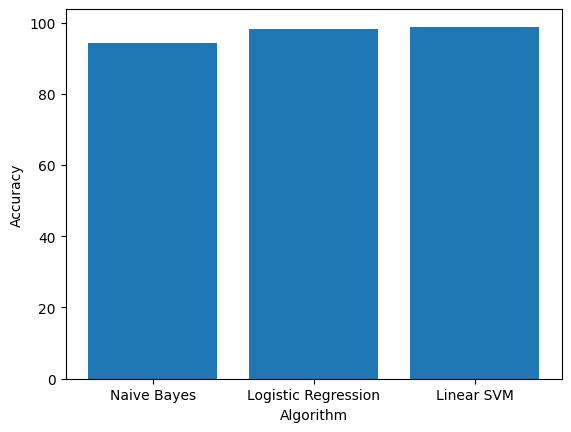

In [35]:
x=['Naive Bayes','Logistic Regression','Linear SVM']
y=[MNB_accuracy,lr_accuracy,sv_accuracy]
plt.bar(x,y)
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.show()

Comparison of accuracy of all the three models.

In [36]:
dtc=DecisionTreeClassifier()
dtc.fit(vec_train_data, y_train)
dtc_pred = dtc.predict(vec_test_data)
dtc_accuracy = accuracy_score(y_test,dtc_pred)*100
dtc_accuracy

96.23333333333333

The accuracy of DecisionTree is not better than our best model which is LinearSVC.

In [37]:
rfc=RandomForestClassifier()
rfc.fit(vec_train_data, y_train)
rfc_pred = rfc.predict(vec_test_data)
rfc_accuracy = accuracy_score(y_test,rfc_pred)*100
rfc_accuracy


97.6

Random Forest also does not provide better accuracy.

In [38]:
test_data=pd.read_csv("/content/drive/MyDrive/Python/test_data.csv")

In [39]:
test_data.description

,description
0,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...
1,Kalpaveda Copper Copper Cuff\n ...
2,Thelostpuppy Book Cover for Apple iPad Air (Mu...
3,Riana Copper Copper Bangle - Buy Riana Copper ...
4,Inox Jewelry Stainless Steel Cuff\n ...
...,...
2529,Buy WallDesign Small Vinyl Sticker for Rs.730 ...
2530,Buy Wallmantra Large Vinyl Stickers Sticker fo...
2531,Buy Elite Collection Medium Acrylic Sticker fo...
2532,Buy Elite Collection Medium Acrylic Sticker fo...


In [40]:
test_data['cleaned_data']=test_data['description'].apply(lambda x:cleanData(x))
test_data

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,cleaned_data
0,4fb99d98225f415e7ece96938e95628f,2015-12-20 08:26:17 +0000,http://www.flipkart.com/v-v-art-brass-bracelet...,V&V ART Brass Bracelet,BBAE6NYHCDTEZJTB,470.0,423.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...,No rating available,No rating available,V&V ART,"{""product_specification""=>[{""key""=>""Brand"", ""v...",v v art brass bracelet buy v v art brass brace...
1,4ea284c8d38b2ea97a1c2a26f34e057c,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kalpaveda-copper-cuff/...,Kalpaveda Copper Copper Cuff,BBAEDFFKZJTY7SZZ,1200.0,1200.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Kalpaveda Copper Copper Cuff\n ...,No rating available,No rating available,Kalpaveda,"{""product_specification""=>[{""key""=>""Stretchabl...",kalpaveda copper copper cuff price r attract e...
2,ee6ce2c7045c54257e2a0b590e09c296,2015-12-20 08:26:17 +0000,http://www.flipkart.com/thelostpuppy-book-cove...,Thelostpuppy Book Cover for Apple iPad Air,ACCEA4DZH6M5SFVH,2199.0,599.0,"[""http://img5a.flixcart.com/image/cases-covers...",False,Thelostpuppy Book Cover for Apple iPad Air (Mu...,No rating available,No rating available,Thelostpuppy,"{""product_specification""=>[{""key""=>""Brand"", ""v...",thelostpuppy book cover apple ipad air multico...
3,e797ba3b5f2e2d1fdc520e48486ab60e,2015-12-20 08:26:17 +0000,http://www.flipkart.com/riana-copper-bangle/p/...,Riana Copper Copper Bangle,BBAEAXFQHHMF3EYZ,2499.0,649.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,Riana Copper Copper Bangle - Buy Riana Copper ...,5,5,Riana,"{""product_specification""=>[{""key""=>""Collection...",riana copper copper bangle buy riana copper co...
4,f4d8d43858c8858c68d75ce07ac641c0,2015-12-20 08:26:17 +0000,http://www.flipkart.com/inox-jewelry-stainless...,Inox Jewelry Stainless Steel Cuff,BBAECH63WYDG6TE2,1629.0,1222.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Inox Jewelry Stainless Steel Cuff\n ...,No rating available,No rating available,Inox Jewelry,"{""product_specification""=>[{""key""=>""Stretchabl...",inox jewelry stainless steel cuff price r inox...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ...",buy walldesign small vinyl sticker r online wa...
2530,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",buy wallmantra large vinyl sticker sticker r o...
2531,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ...",buy elite collection medium acrylic sticker r ...
2532,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,STIE8YSVEPPCZ42Y,1499.0,1199.0,"[""http://img5a.flixcart.com/image/sticker/4/2/...",False,Buy Elit

In [41]:
test_data.description=test_data.description.apply(lambda x:x.strip())


In [42]:
test_data=test_data.fillna("Nan")
test_data.isnull().sum()

,0
uniq_id,0
crawl_timestamp,0
product_url,0
product_name,0
pid,0
retail_price,0
discounted_price,0
image,0
is_FK_Advantage_product,0
description,0


In [43]:
print(sv_clf.predict(vect.transform(['v v art brass bracelet buy v v art brass brace'])))

['Jewellery']


In [44]:
result=sv_clf.predict(vect.transform(test_data['description']))
print(result)

['Jewellery' 'Jewellery' 'Mobiles & Accessories' ...
 'Home Decor & Festive Needs' 'Home Decor & Festive Needs'
 'Home Decor & Festive Needs']


In [45]:
test_data['product_category_tree']=result

In [46]:
test_data

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,cleaned_data,product_category_tree
0,4fb99d98225f415e7ece96938e95628f,2015-12-20 08:26:17 +0000,http://www.flipkart.com/v-v-art-brass-bracelet...,V&V ART Brass Bracelet,BBAE6NYHCDTEZJTB,470.0,423.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...,No rating available,No rating available,V&V ART,"{""product_specification""=>[{""key""=>""Brand"", ""v...",v v art brass bracelet buy v v art brass brace...,Jewellery
1,4ea284c8d38b2ea97a1c2a26f34e057c,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kalpaveda-copper-cuff/...,Kalpaveda Copper Copper Cuff,BBAEDFFKZJTY7SZZ,1200.0,1200.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Kalpaveda Copper Copper Cuff\n ...,No rating available,No rating available,Kalpaveda,"{""product_specification""=>[{""key""=>""Stretchabl...",kalpaveda copper copper cuff price r attract e...,Jewellery
2,ee6ce2c7045c54257e2a0b590e09c296,2015-12-20 08:26:17 +0000,http://www.flipkart.com/thelostpuppy-book-cove...,Thelostpuppy Book Cover for Apple iPad Air,ACCEA4DZH6M5SFVH,2199.0,599.0,"[""http://img5a.flixcart.com/image/cases-covers...",False,Thelostpuppy Book Cover for Apple iPad Air (Mu...,No rating available,No rating available,Thelostpuppy,"{""product_specification""=>[{""key""=>""Brand"", ""v...",thelostpuppy book cover apple ipad air multico...,Mobiles & Accessories
3,e797ba3b5f2e2d1fdc520e48486ab60e,2015-12-20 08:26:17 +0000,http://www.flipkart.com/riana-copper-bangle/p/...,Riana Copper Copper Bangle,BBAEAXFQHHMF3EYZ,2499.0,649.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,Riana Copper Copper Bangle - Buy Riana Copper ...,5,5,Riana,"{""product_specification""=>[{""key""=>""Collection...",riana copper copper bangle buy riana copper co...,Jewellery
4,f4d8d43858c8858c68d75ce07ac641c0,2015-12-20 08:26:17 +0000,http://www.flipkart.com/inox-jewelry-stainless...,Inox Jewelry Stainless Steel Cuff,BBAECH63WYDG6TE2,1629.0,1222.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Inox Jewelry Stainless Steel Cuff\n ...,No rating available,No rating available,Inox Jewelry,"{""product_specification""=>[{""key""=>""Stretchabl...",inox jewelry stainless steel cuff price r inox...,Jewellery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ...",buy walldesign small vinyl sticker r online wa...,Home Decor & Festive Needs
2530,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",buy wallmantra large vinyl sticker sticker r o...,Home Decor & Festive Needs
2531,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ...",buy elite collection medium acrylic sticker r ...,Home Decor & Festive Needs
2532,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart